# 서울시 자치구별 CCTV 현황 프로젝트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

## EDA

In [2]:
# Read CSV
seoul_cctv = pd.read_csv('C:/Users/User/Desktop/DA Study/data/01. CCTV_in_Seoul.csv', encoding = 'utf-8')
seoul_cctv.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
seoul_cctv.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
# 기관명 → 구별로 컬럼명 변경
seoul_cctv.rename(columns={seoul_cctv.columns[0]:'구별'}, inplace = True)
# inplace : 실제 seoul_cctv의 변수 내용 갱신
seoul_cctv.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [5]:
# Read Excel
seoul_pop = pd.read_excel('C:/Users/User/Desktop/DA Study/data/01. population_in_Seoul.xls', header=2, usecols='B, D, G, J, N')
seoul_pop.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [6]:
# 서울 인구 xls 컬럼명 재설정
seoul_pop.rename(columns={seoul_pop.columns[0]:'구별', seoul_pop.columns[1]:'인구수',seoul_pop.columns[2]:'한국인',seoul_pop.columns[3]:'외국인',seoul_pop.columns[4]:'고령자'}, inplace = True)
seoul_pop.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [7]:
# CCTV 전체 개수 상위 5개 자치구
seoul_cctv.sort_values(by='소계', ascending = False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [8]:
# CCTV 전체 개수 하위 5개 자치구
seoul_cctv.sort_values(by='소계', ascending = True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [9]:
seoul_cctv['최근증가율'] = ((seoul_cctv['2016년'] + seoul_cctv['2015년'] + seoul_cctv['2014년']) / seoul_cctv['2013년도 이전']) * 100
seoul_cctv.sort_values(by='최근증가율', ascending=False)

# 종로, 도봉, 마포, 노원, 강동구의 CCTV 증가율이 상위 5위

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765
19,영등포구,904,495,214,195,373,157.979798
0,강남구,2780,1292,430,584,932,150.619195
4,관악구,1496,846,260,390,613,149.290780
23,중구,671,413,190,72,348,147.699758
11,동작구,1091,544,341,103,314,139.338235


In [10]:
seoul_pop.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [11]:
# 합계 행 제거
seoul_pop = seoul_pop.drop([0])

In [12]:
seoul_pop

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [13]:
# unique 조사
seoul_pop['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [14]:
# NaN 데이터 추출
seoul_pop[seoul_pop['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [15]:
# NaN 데이터 제거
seoul_pop.dropna() # 혹은 seoul_pop([26])

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [16]:
# 외국인비율, 고령자비율 계산
seoul_pop['외국인비율'] = (seoul_pop['외국인'] / seoul_pop['인구수']) * 100
seoul_pop['고령자비율'] = (seoul_pop['고령자'] / seoul_pop['인구수']) * 100
seoul_pop.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [17]:
# 인구수 상위 5개 자치구
seoul_pop.sort_values(by='인구수', ascending = False).head()
# 송파, 강서, 강남, 노원, 관악

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [18]:
# 외국인수 상위 5개 자치구
seoul_pop.sort_values(by='외국인', ascending = False).head()
# 영등포, 구로, 금천, 관악, 동대문

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [19]:
# 외국인비율 상위 5개 자치구
seoul_pop.sort_values(by='외국인비율', ascending = False).head()
# 영등포, 금천, 구로, 중구, 용산

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [20]:
# 고령자수 상위 5개 자치구
seoul_pop.sort_values(by='고령자', ascending = False).head()
# 강서, 송파, 은평, 노원, 관악

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [21]:
# 고령자비율 상위 5개 자치구
seoul_pop.sort_values(by='고령자비율', ascending = False).head()
# 강북, 종로, 중구, 용산, 서대문

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## Merge Data

In [22]:
# 구별을 기준으로 두 데이터를 병합
df_result = pd.merge(seoul_cctv, seoul_pop, on='구별')
df_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [23]:
# 불필요한 데이터 삭제 : del (열 방향 삭제)
del df_result['2013년도 이전']
del df_result['2014년']
del df_result['2015년']
del df_result['2016년']
df_result.head()
# 행 방향 삭제는 drop

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [24]:
# 구별을 인덱스로 지정
df_result.set_index('구별', inplace = True)
df_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [25]:
# 상관계수 파악 (피어슨 상관계수)
# -1.0 ~ -0.7 : 강한 음적 상관관계
# -0.7 ~ -0.3 : 뚜렷한 음적 상관관계
# -0.3 ~ -0.1 : 약한 음적 상관관계
# -0.1 ~ +0.1 : 없다고 할 수 있는 상관관계
# +0.1 ~ +0.3 : 약한 양적 상관관계
# +0.3 ~ +0.7 : 뚜렷한 양적 상관관계
# +0.7 ~ +1.0 : 강한 양적 상관관계

np.corrcoef(df_result['고령자비율'], df_result['소계'])
# CCTV와 비교할 데이터를 정하는 작업으로 상관계수 비교
# NumPy의 corrcoef 명령은 주 대각선을 기준으로 대칭 행렬이고, 주 대각선을 제외한 값이 상관계수
# 약한 음적 상관관계

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [26]:
np.corrcoef(df_result['외국인비율'], df_result['소계'])
# 약한 음적 상관관계

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [27]:
np.corrcoef(df_result['인구수'], df_result['소계'])
# 뚜렷한 양적 상관관계

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [28]:
## CCTV와 인구수의 관계 분석
df_result.sort_values(by = '인구수', ascending=False).head()
# 인구수 기준 상위 5위 : 송파, 강서, 강남, 노원, 관악

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [29]:
df_result.sort_values(by = '소계', ascending=False).head()
# CCTV 설치대수 기준 상위 5위 : 강남, 양천, 서초, 은평, 용산

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


## Visualisation

In [30]:
# 한글 폰트 처리
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
# 한글 폰트 처리 종료

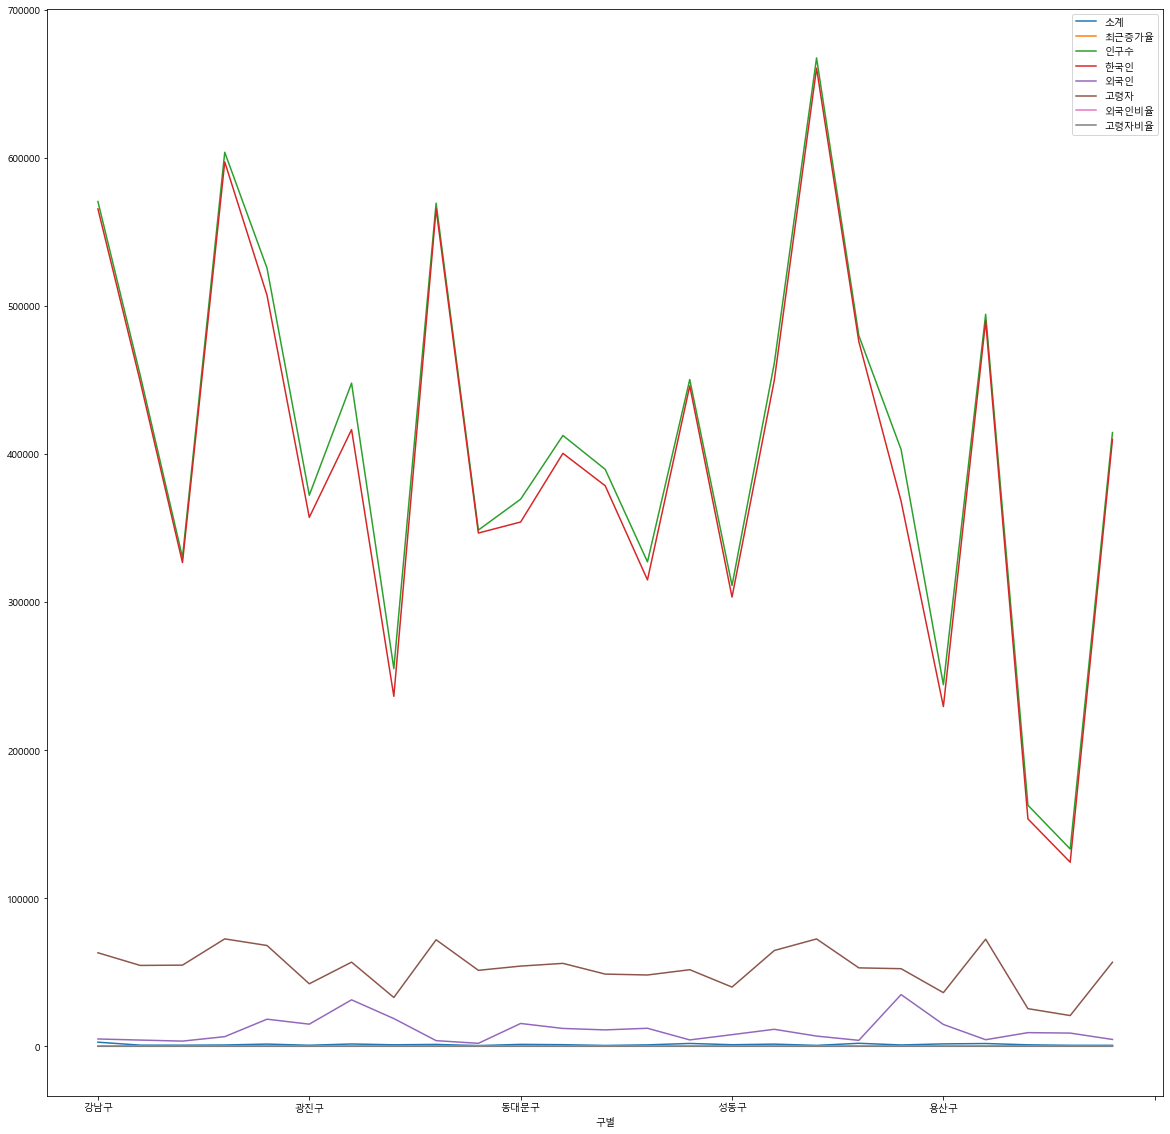

In [31]:
df_result.plot(figsize=(20,20));

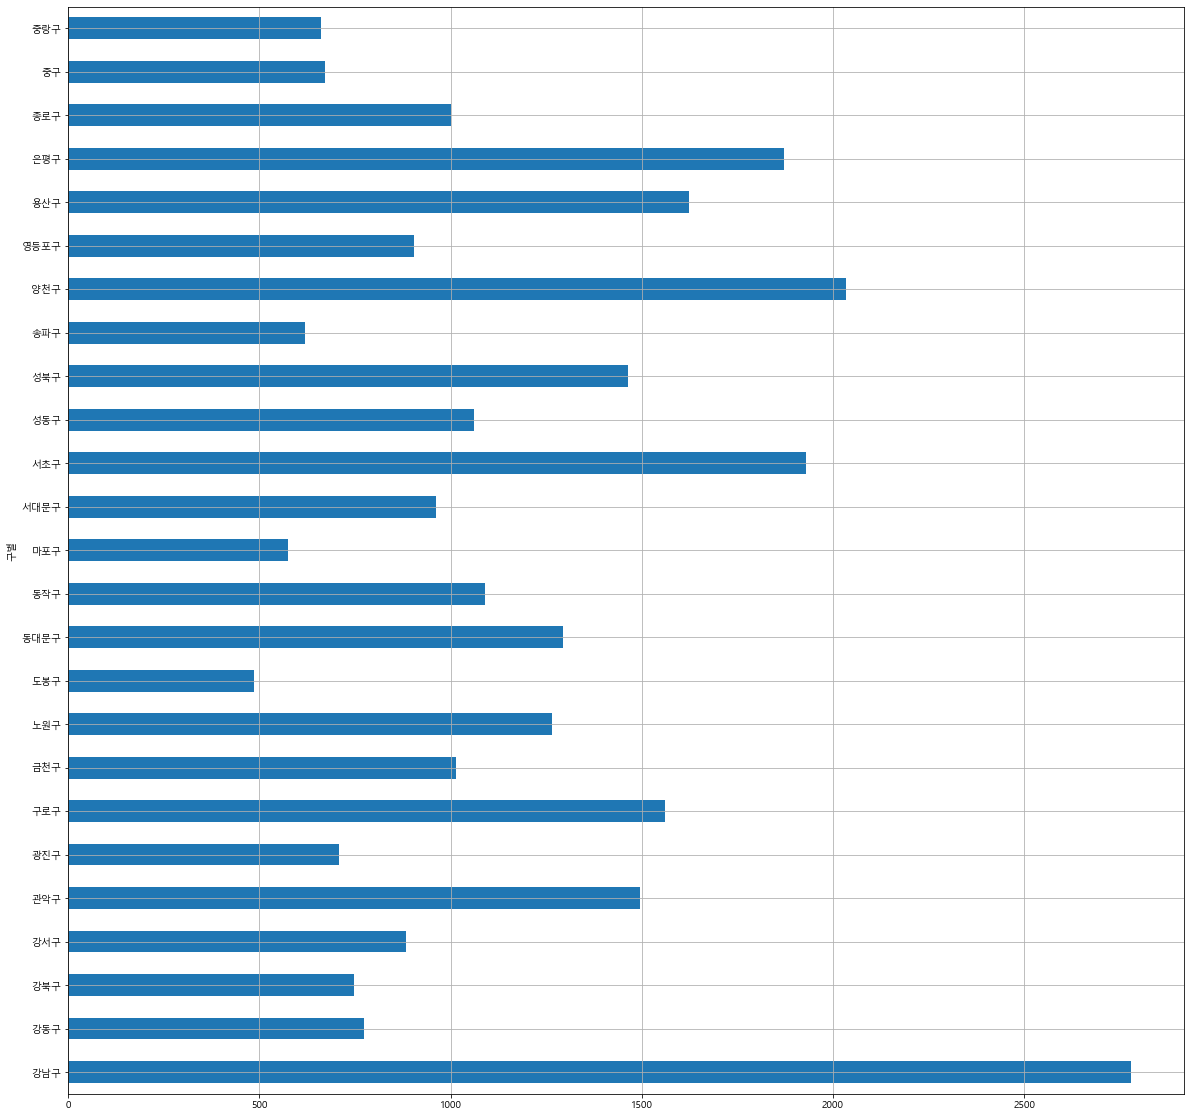

In [32]:
# Horizontal Bar Graph
df_result['소계'].plot(kind='barh', grid=True, figsize=(20,20))
plt.show()
# kind 옵션으로 그래프 형태 지정 가능
# grid 옵션으로 격자선(구분선) 지정 가능

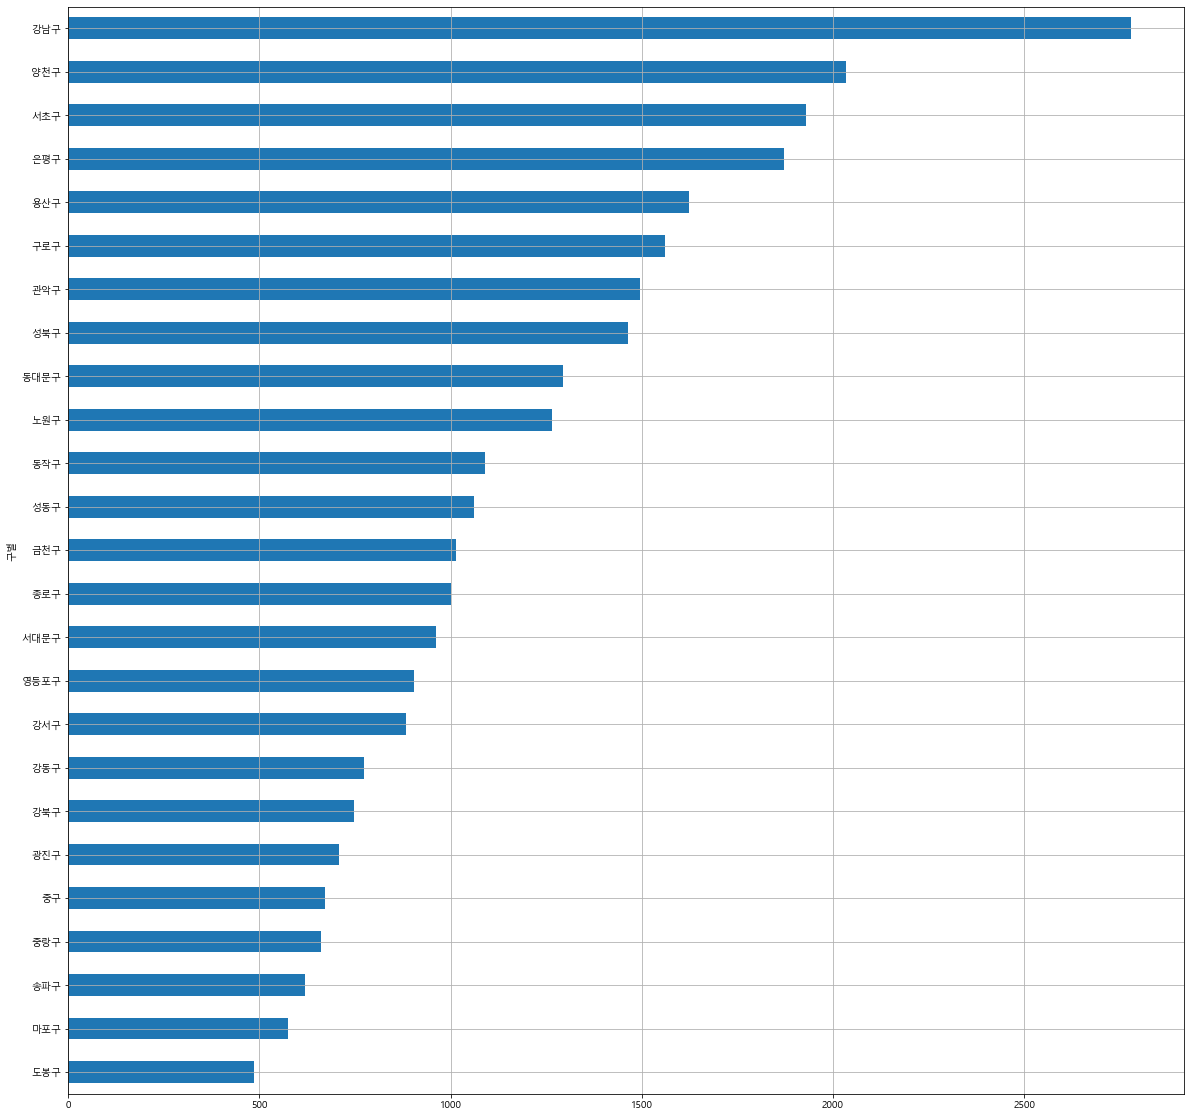

In [33]:
# 내림차순으로 정렬된 Horizontal Bar Graph
df_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(20,20))
plt.show()

In [34]:
# 인구 대비 CCTV 비율 Graph 작업
df_result['CCTV비율'] = (df_result['소계'] / df_result['인구수']) * 100
df_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673


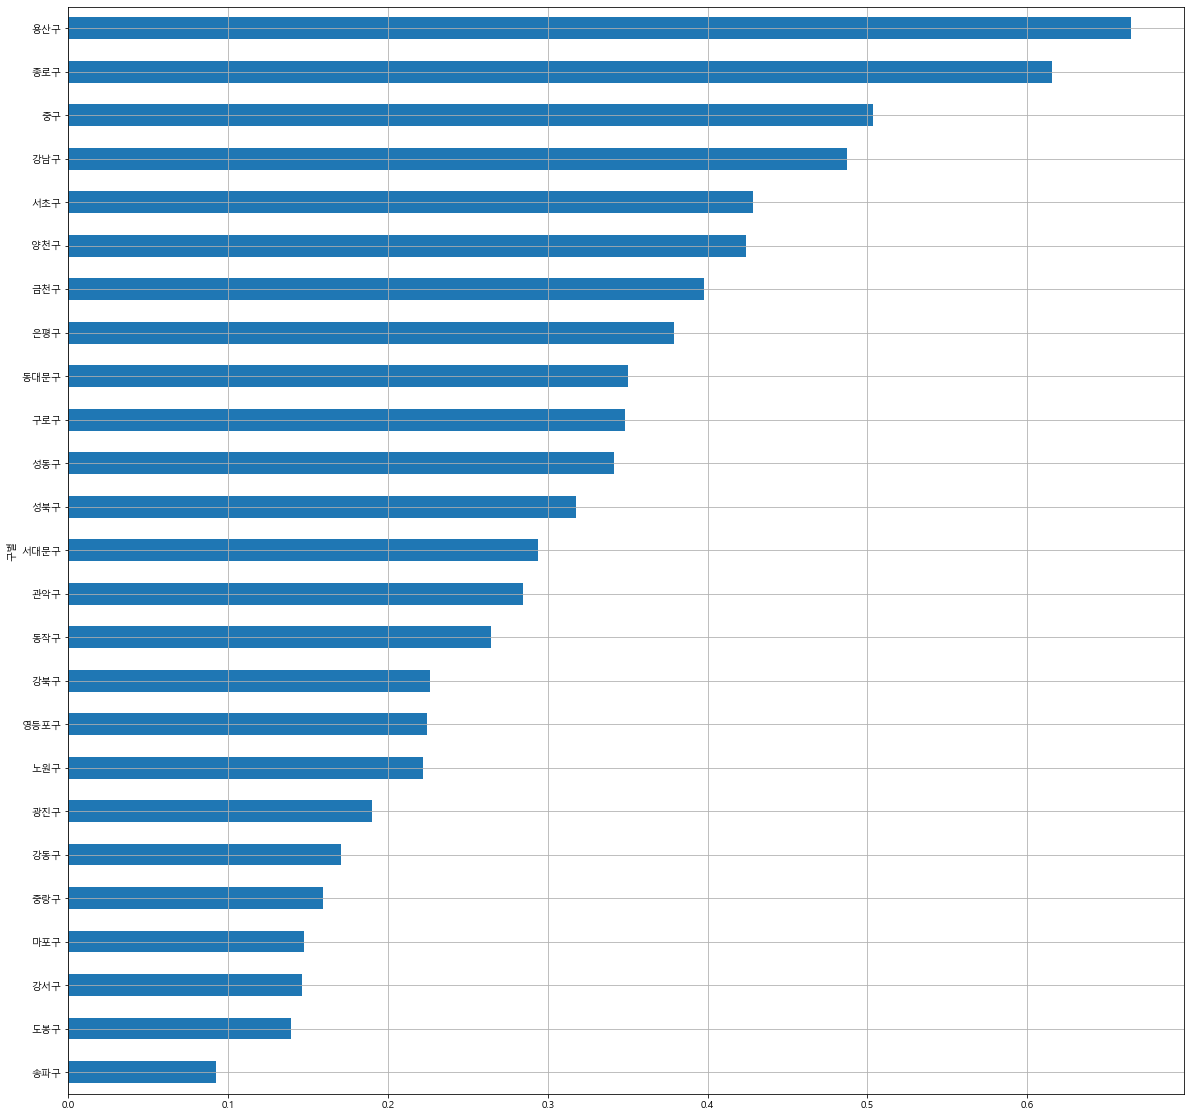

In [35]:
df_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(20,20))
plt.show()
# 인구 대비 CCTV 비율 상위 5위 : 용산, 종로, 중구, 강남, 서초

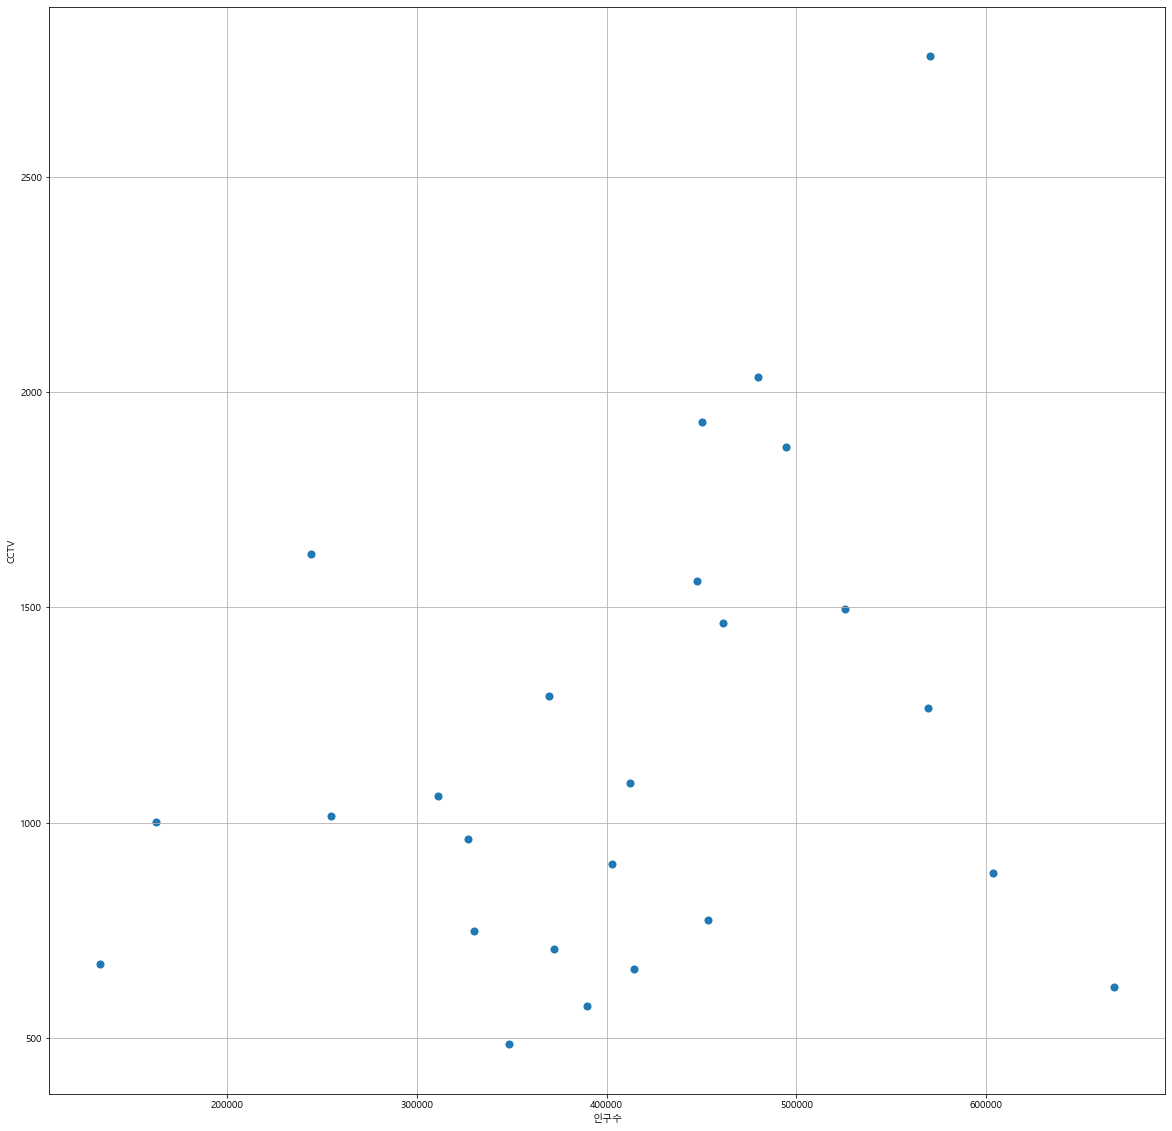

In [36]:
# 산점도
plt.figure(figsize=(20,20))
plt.scatter(df_result['인구수'], df_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [37]:
# 산점도에 표시할 대표 직선 : np.polyfit 이용
pf1 = np.polyfit(df_result['인구수'], df_result['소계'], 1) 
pf1

array([1.30916415e-03, 6.45066497e+02])

In [38]:
# x축, y축 설정
fx = np.linspace(100000, 700000, 100) # X축 데이터
fy = np.poly1d(pf1) # Y축 데이터

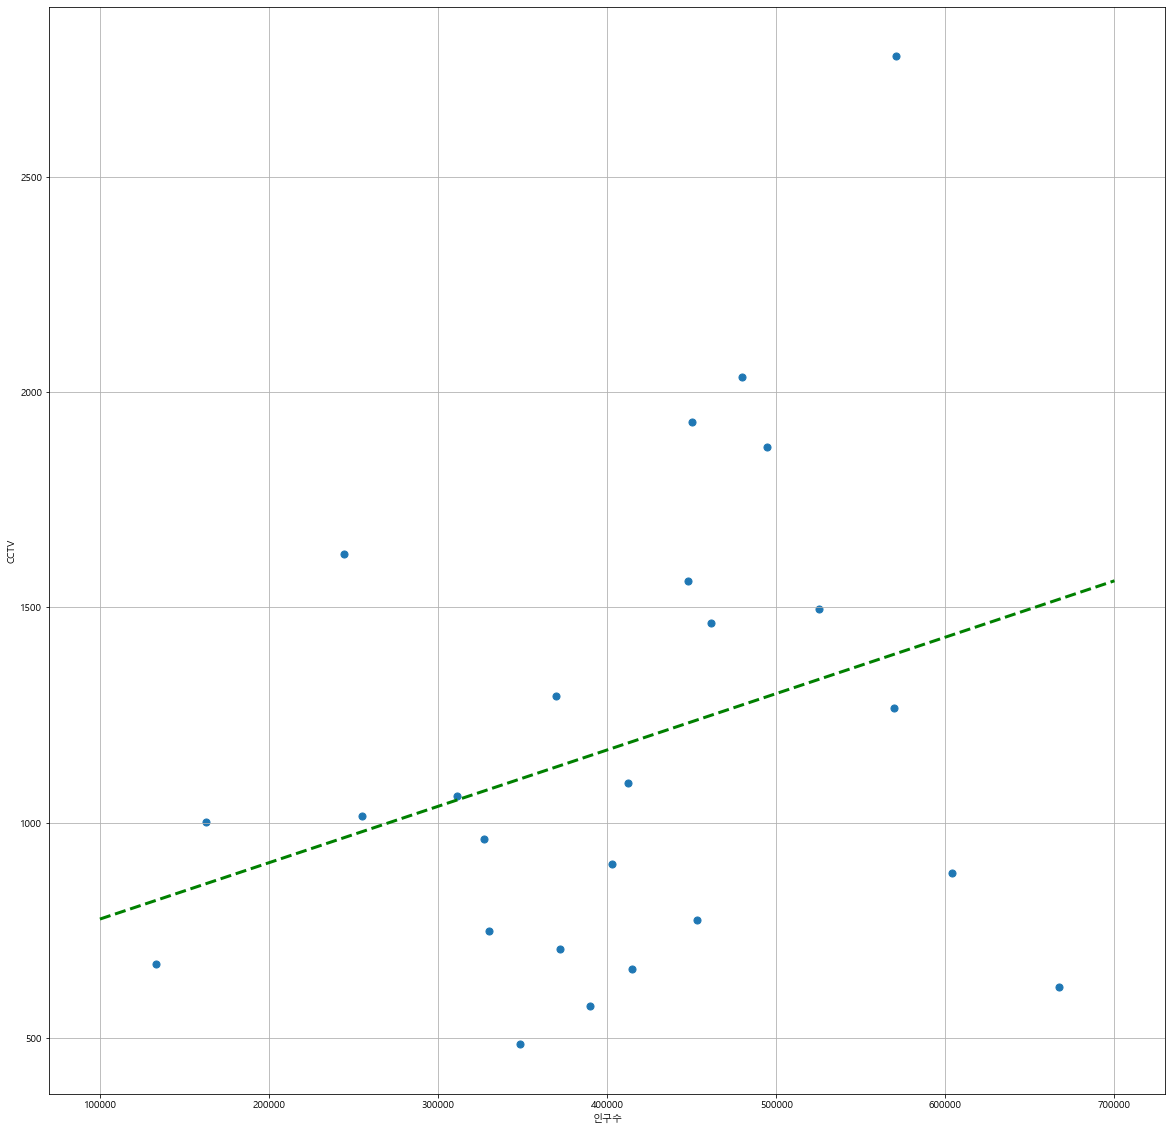

In [39]:
# 그래프
plt.figure(figsize=(20,20))
plt.scatter(df_result['인구수'], df_result['소계'], s=50)
plt.plot(fx, fy(fx), '--g', lw=3) 
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [40]:
# 대표 직선과 많이 떨어진 점의 레이블 표시 및 다른 색상 표시
# 오차를 계산하여 오차가 큰 순으로 데이터 정렬
df_result['오차'] = np.abs(df_result['소계'] - fy(df_result['인구수']))

df_sort = df_result.sort_values(by = '오차', ascending=False)
df_sort.head(10)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690
도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.139110,616.501341
마포구,574,212.101911,389649.0,378566.0,11083.0,48765.0,2.844355,12.515110,0.147312,581.180999
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,0.378852,580.698457
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155


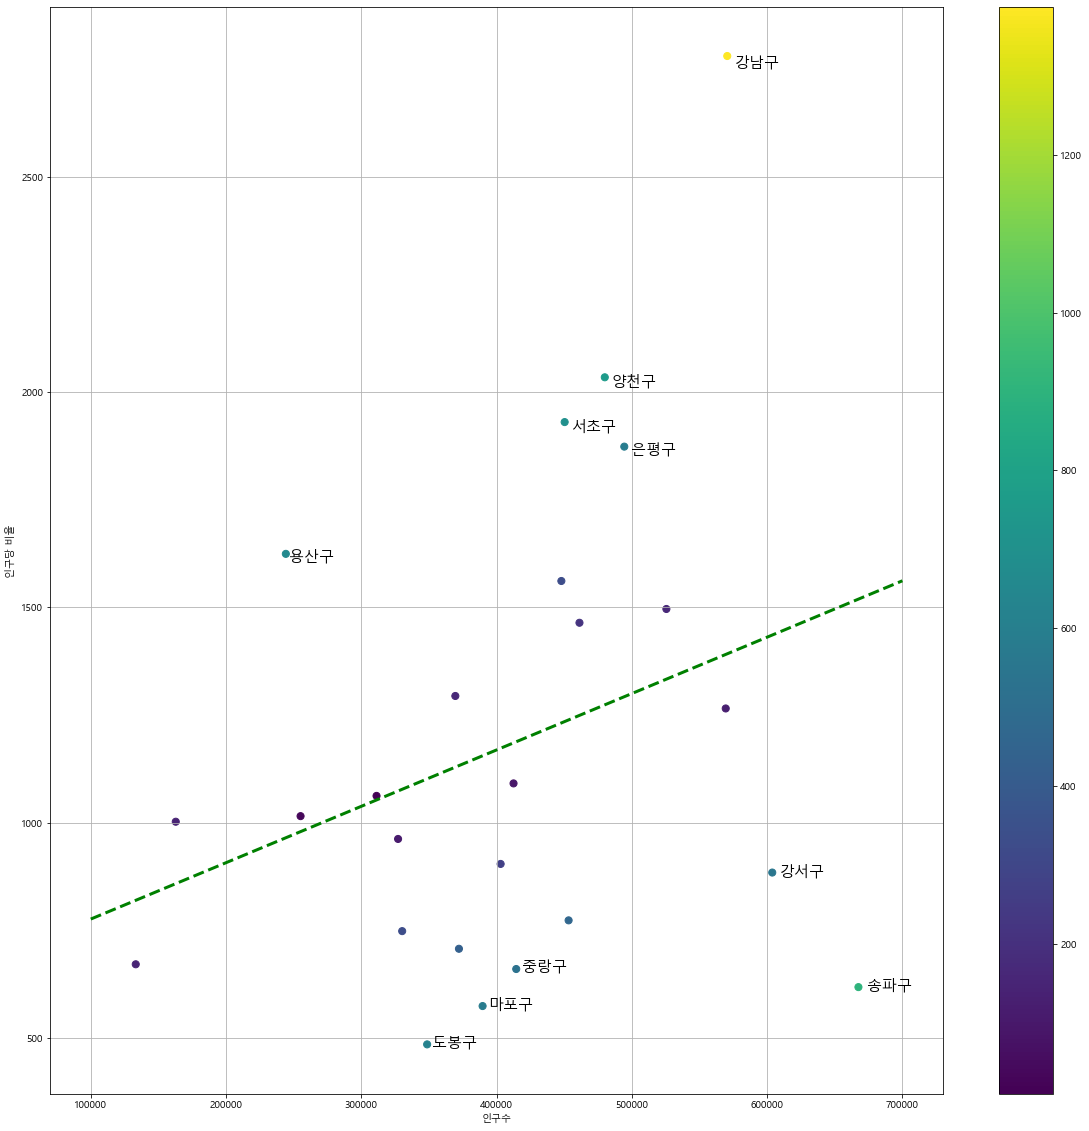

In [41]:
# 텍스트 및 Color mapping
plt.figure(figsize=(20,20))
plt.scatter(df_result['인구수'], df_result['소계'],c=df_result['오차'], s=50)
plt.plot(fx, fy(fx), '--g', lw=3) 

# 텍스트 표시 loop : 오차 기준 상위 10개 구 표시
# df_sort[columns] * N은 텍스트 표시 위치
for n in range(10):
    plt.text(df_sort['인구수'][n] * 1.01, df_sort['소계'][n] * 0.99, df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당 비율')

plt.colorbar()
plt.grid()
plt.show()

#### 강남구는 인구수 대비 많은 CCTV가 설치되어 있고, 송파구는 인구수 대비 적은 CCTV가 설치되어 있음을 확인 가능